In [208]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB  #classifier is suitable for classification with discrete features

In [209]:
df = pd.read_csv('./Language_det_train.csv') # ,index_col='Language'
df.head(10)

,Text,Language
0,στη Γαλλία νωρίτερα ραντεβού χρησιμοποιήθηκε α...,Greek
1,e con ciò lei salì nella sua carrozza e senza ...,Italian
2,buna değmez.,Turkish
3,Viktiga skillnader är att i en wiki lagras sid...,Sweedish
4,تعرف على ما إذا كان شخص ما يقول نكتة رائعة يمك...,Arabic
5,bir dakika bekleyin.,Turkish
6,"O ex-editor chefe da Encyclopædia Britannica, ...",Portugeese
7,Qual'è il tuo punto di vista?,Italian
8,you were saying .if somebody got a job of his ...,English
9,நீங்கள் ராக் யூ ராக்?,Tamil


In [210]:
# Count distinct lines for each language
language_counts = df.groupby('Language')['Text'].nunique()

# Print the counts and unique counts
print(f'total unique counts for language df : {df.nunique(axis=0)}')
print(language_counts.sort_values(ascending=False))

total unique counts for language df : Text        9754
Language      17
dtype: int64
Language
English       1313
French         956
Spanish        775
Portugeese     699
Italian        660
Russian        653
Sweedish       639
Malayalam      561
Dutch          515
Arabic         505
Turkish        447
German         441
Tamil          441
Danish         403
Kannada        349
Greek          341
Hindi           60
Name: Text, dtype: int64


In [211]:
# making sure no null values are present
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [212]:
x = np.array(df["Text"])
y = np.array(df["Language"])

In [213]:
#Label Encoding to convert it into a numerical form
le = LabelEncoder()
y = le.fit_transform(y)

In [214]:
data_list = []

# iterating through all the text
for text in x:         
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      # removing the symbols and numbers
    text = re.sub(r'[[]]', ' ', text)   
    text = text.lower()          # converting the text to lower case
    data_list.append(text)       # appending to data_list

In [215]:
#Bag of Words [ converting text into numerical form by creating a Bag of Words model using CountVectorizer.]
cv = CountVectorizer() # tokenize a collection of text documents
X = cv.fit_transform(data_list).toarray()
X.shape 

(9820, 33934)

In [216]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42,stratify=y)

In [217]:
# Model Training
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [218]:
x_test.shape

(1964, 33934)

In [219]:
# predict output for test dataset
y_pred = model.predict(x_test)

In [220]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

In [221]:
print("Accuracy is :",ac)

Accuracy is : 0.9694501018329938


In [222]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.97      0.91      0.94        81
           2       0.99      0.94      0.97       104
           3       0.88      1.00      0.93       263
           4       0.98      0.99      0.98       193
           5       0.98      0.98      0.98        89
           6       1.00      0.94      0.97        69
           7       1.00      0.92      0.96        12
           8       0.98      0.98      0.98       133
           9       1.00      0.90      0.95        70
          10       1.00      0.97      0.99       113
          11       0.97      0.97      0.97       140
          12       1.00      0.98      0.99       132
          13       0.97      0.97      0.97       156
          14       0.98      0.98      0.98       128
          15       1.00      0.98      0.99        89
          16       1.00      0.93      0.97        90

    accuracy              

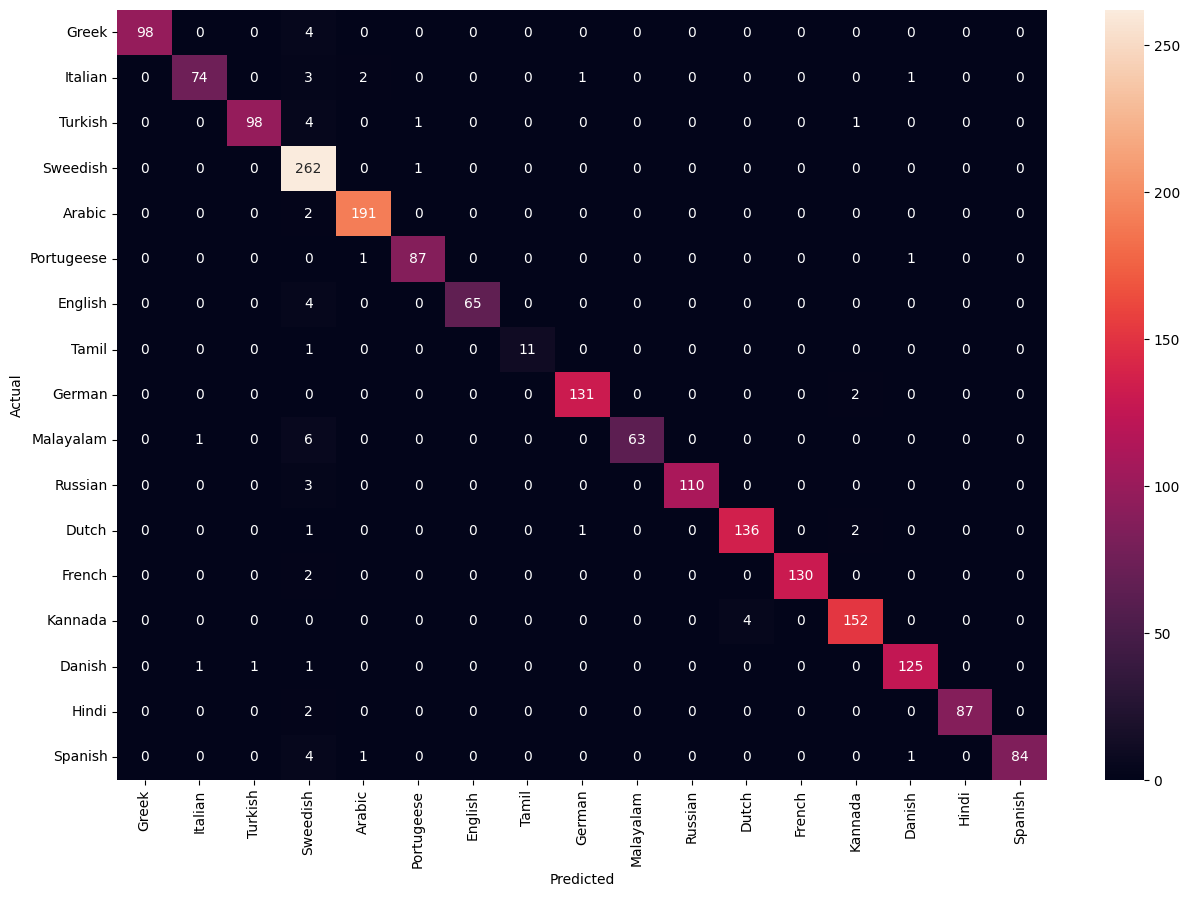

In [223]:
class_labels = df['Language'].unique()
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True,fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

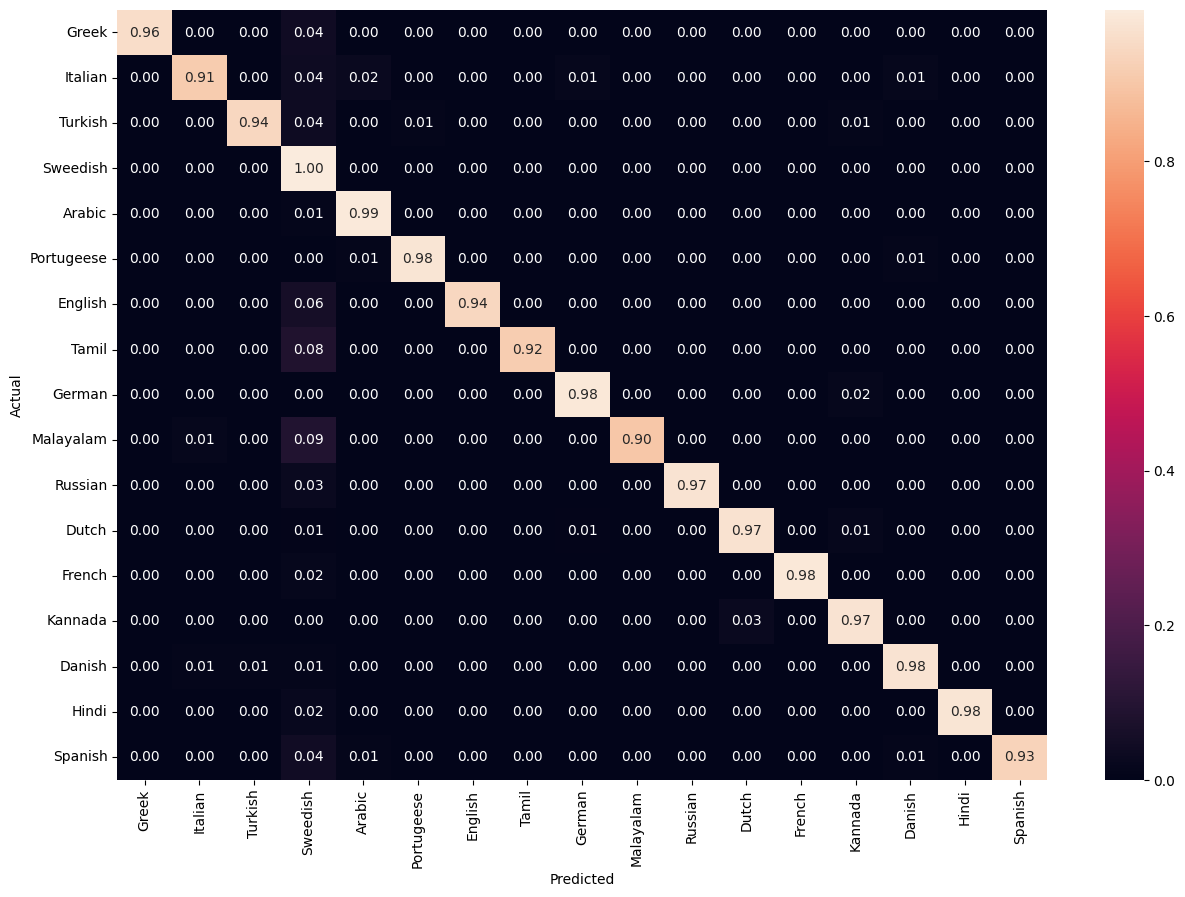

In [224]:
# Normalized Confusion Matrix

class_labels = df['Language'].unique()

# Normalize the confusion matrix
cm_normalized = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(15, 10))
sns.heatmap(cm_normalized, annot=True,fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [225]:
def predict(text, model):
    x = cv.transform([text]).toarray()  # Convert text to bag of words model (Vector)
    lang = model.predict(x)  # Predict the language
    lang = le.inverse_transform(lang)  # Convert language ID to language label
    print("The language is", lang[0])  # Printing the language


In [226]:
predict('People are awesome',model=model)

The language is English


In [227]:
predict('നൽകുന്നു',model)

The language is Malayalam


In [228]:
predict('لا',model)

The language is Arabic


In [191]:
# # Save the trained model as a pickle file
# with open('language_detection.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [242]:
import pickle

# Assuming you have model, cv, and le already defined
objects_to_save = {
    'model': model,
    'cv': cv,
    'le': le
}

with open('language_detection.pkl', 'wb') as f:
    pickle.dump(objects_to_save, f,protocol=pickle.HIGHEST_PROTOCOL)

# Save the model, cv, and le objects as a tuple to a pickle file
# with open('language_detection.pkl', 'wb') as f:
#     pickle.dump(model, f)


In [239]:
import pickle

# Load the objects from the pickle file
with open('language_detection.pkl', 'rb') as f:
    saved_objects = pickle.load(f)

# Extract the model, cv, and le objects from the dictionary
model = saved_objects['model']
cv = saved_objects['cv']
le = saved_objects['le']

# Now you can use the loaded model object for prediction
text_to_predict = "لا"
# Transform the input text using the CountVectorizer used during prediction
x = cv.transform([text_to_predict]).toarray()
# Predict the language
predicted_language_id = model.predict(x)[0]
predicted_language = le.inverse_transform([predicted_language_id])[0]

print("Predicted Language:", predicted_language)


Predicted Language: Arabic


In [240]:
print("""
the problem with this model is that it recongizes the words like a vocab 
if you gave it something different it won't work as expected
and i think if i made the model to work on character level 
check first this would be much better
""")


the problem with this model is that it recongizes the words like a vocab 
if you gave it something different it won't work as expected
and i think if i made the model to work on character level 
check first this would be much better



In [256]:
import requests
import time

# Define the URL of your FastAPI endpoint
url = "http://localhost:8000/predict_language/"  # Replace with your actual endpoint URL

# Define the request payload
payload = {
    "text": "This is a sample text for language prediction."
}

# Record the time just before sending the request
start_time = time.time()

# Send the POST request to the endpoint
response = requests.post(url, json=payload)

# Record the time just after receiving the response
end_time = time.time()

# Calculate the total response time
response_time = end_time - start_time

# Print the response and response time
print("Response:", response.json())
print("Response Time:", response_time, "seconds")


Response: {'predicted_language': 'English'}
Response Time: 2.0790605545043945 seconds


In [255]:
import pickle
import time

# Load the objects from the pickle file
with open('language_detection.pkl', 'rb') as f:
    saved_objects = pickle.load(f)

# Extract the model, cv, and le objects from the dictionary
model = saved_objects['model']
cv = saved_objects['cv']
le = saved_objects['le']

# Now you can use the loaded model object for prediction
text_to_predict = "لا"

# Record the start time
start_time = time.time()

# Transform the input text using the CountVectorizer used during prediction
x = cv.transform([text_to_predict]).toarray()

# Predict the language
predicted_language_id = model.predict(x)[0]
predicted_language = le.inverse_transform([predicted_language_id])[0]

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print("Predicted Language:", predicted_language)
print("Time taken:", elapsed_time, "seconds")


Predicted Language: Arabic
Time taken: 0.0015337467193603516 seconds


In [4]:
import re

def detect_language(text):
    arabic_pattern = re.compile(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]+')  # Arabic Unicode range
    english_pattern = re.compile(r'[a-zA-Z]+')  # English alphabet

    if arabic_pattern.search(text):
        return "Arabic"
    elif english_pattern.search(text):
        return "English"
    else:
        return "Unknown"

# Example usage:
Sentence_2 = "انا لا اشعر بالعطش" # Arabic text
print(detect_language(Sentence_2))  # Output: Arabic

Sentence_2 = "im trying to sleep"  # English text
print(detect_language(Sentence_2))  # Output: English


Arabic
English


In [8]:
Sentence_2 = 'انا لا اشعر بالعطش'
# Sentence_2 = "im trying to sleep"  # English text
language_detector = detect_language(Sentence_2)
    
if language_detector == "Arabic":
    print('arabic sentence')
    # translated_text = evaluateSpecificSentence_ara_eng1(encoder, decoder, Sentence_2, input_lang, output_lang)
else:
    print('english sentence')
    # translated_text = evaluateSpecificSentence_eng_ara(encoder, decoder, Sentence_2, input_lang, output_lang)

arabic sentence
